# CLIM 680 Climate Data 

## Assignment 2: Create a 12-panel plot of the climatology of our data
Dataset: Daily Soil Moisture from ESA Climate Change Initiative (CCI) SM v07.1 (Temporal Resolution: 2011-2020, Spatial Resolution: 0.25°, Case study: Global)

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

Load data




In [7]:
file = '/scratch/ntavakol/ntavakol/CCI_Final/CCI_Lon.nc'
ds=xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:  (time: 3653, lon: 1440, lat: 600)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -59.38 -59.62 -59.88
Data variables:
    sm       (time, lat, lon) float32 ...
Attributes: (12/46)
    CDI:                          Climate Data Interface version 1.9.10 (http...
    Conventions:                  CF-1.9
    source:                       WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Mois...
    institution:                  TU Wien (AUT); VanderSat B.V. (NL)
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    contact:                      cci_sm_contact@eodc.eu
    ...                           ...
    geospatial_lat_resolution:    0.25 degree
    geospatial_lon_resolution:    0.25 degree
    spatial_resolution:           25km
    time_coverage_start:          20110101T000000Z
    time_coverage_end:            20110101T235959Z
    CDO:                          Climate Data Operators version 1.9.10 (http...

Calculate Monthly means

In [8]:
ds_sm=ds.groupby('time.month').mean()
ds_sm

<xarray.Dataset>
Dimensions:  (lon: 1440, lat: 600, month: 12)
Coordinates:
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -59.38 -59.62 -59.88
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sm       (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [9]:
ds_sm['month']=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

Text(0.5, 0.98, 'Volumetric Soil Moisture from ESA CCI SM v07.1')

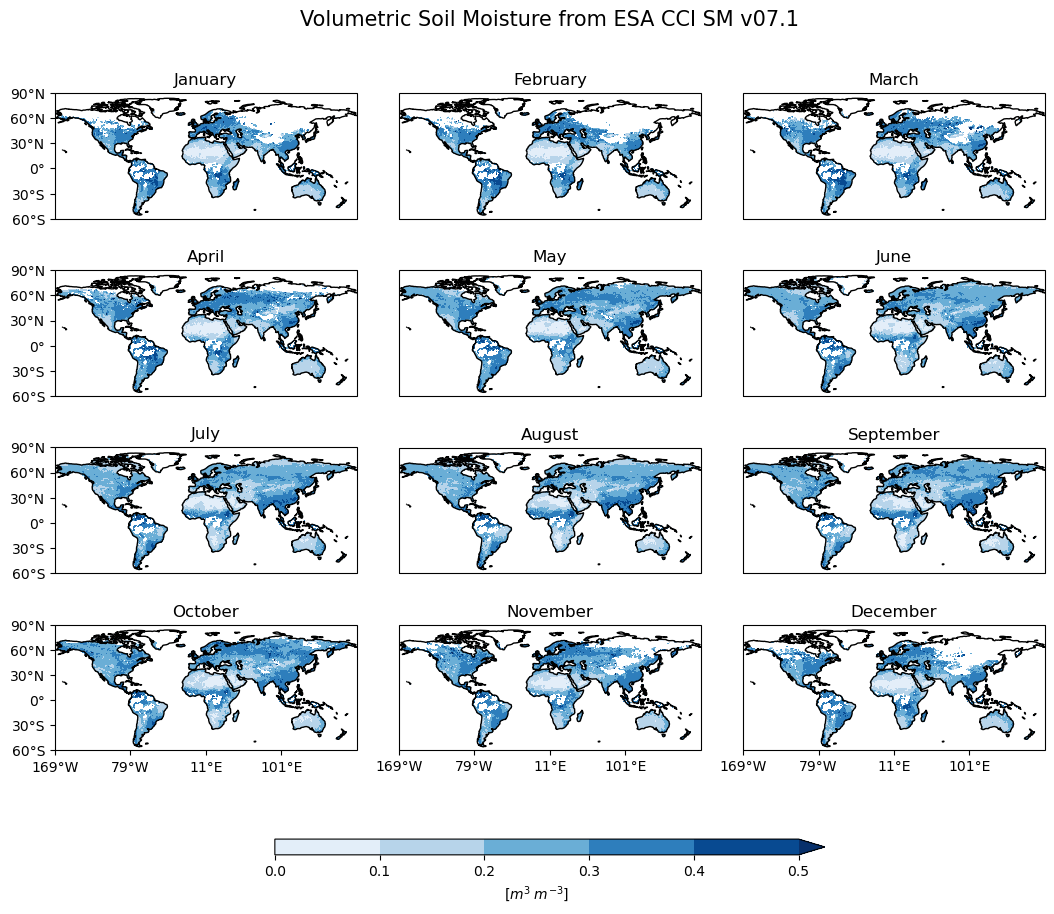

In [10]:
# Define the figure and each axis for the 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=11)},
                        figsize=(11,10.5))

# We will flatten 2 dimensional array of `GeoAxes into a 1-D array
axs=axs.flatten()

#Loop over all of the month and plot
for i,sm in enumerate(ds_sm['month']):

        # Select the season
        data=ds_sm['sm'].sel(month=sm)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_sm['lon'])
        
        # Contour plot
        clevs=np.arange(0,0.6,0.1)
        cs=axs[i].contourf(lons,ds_sm['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='Blues',extend='max')

       # Longitude labels
        a=[9,10,11]
        for a in a:
            axs[a].set_xticks(np.arange(-169,191,90), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        
       

        # Latitude labels
        b=[0,3,6,9]
        for b in b:
            axs[b].set_yticks(np.arange(-60,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        

        # Title each subplot with the name of the season
        axs[i].set_title(sm.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.925, left=0.05, right=0.95,
                    wspace=0.14, hspace=0.001)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.175, 0.5, 0.015])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='[$m^{3}\;m^{-3}$]')

# Add a big title at the top
plt.suptitle('Volumetric Soil Moisture from ESA CCI SM v07.1',fontsize=15)